In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame=pd.read_csv("car_web_scraped_dataset.csv")
dataFrame

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"
...,...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","2 accidents reported, 3 Owners","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","1 accident reported, 3 Owners","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


In [3]:
dataFrame=dataFrame.drop("condition",axis=1)

In [4]:
dataFrame

,name,year,miles,color,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","$19,498"
...,...,...,...,...,...
2835,Ford Escape,2013,"98,601 miles","Silver exterior, Unknown interior","$8,995"
2836,Mercedes-Benz R-Class,2009,"120,694 miles","Black exterior, Black interior","$9,495"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","$22,992"


In [5]:
#Farklı markaların kategorik verilerini numeriğe dönüştürüyoruz
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder=LabelEncoder()
dataFrame["name_encoder"]=label_encoder.fit_transform(dataFrame["name"])

In [7]:
'''fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sbn.countplot(x='name', data=df, ax=axes[0])
axes[0].set_title('Asıl Veri')

sbn.countplot(x='marka_encoder', data=df, ax=axes[1])
axes[1].set_title('Label Encoding Sonrası')

plt.show() '''
#label encodingi kontrol ettim
print("Sınıf Etiketleri:", label_encoder.classes_)
print("Atamalar:", label_encoder.transform(label_encoder.classes_))


Sınıf Etiketleri: ['Acura ILX' 'Acura Integra' 'Acura MDX' 'Acura RDX' 'Acura TLX'
 'Alfa Romeo Giulia' 'Alfa Romeo Stelvio' 'Aston Martin DB9'
 'Aston Martin Vantage' 'Audi A3' 'Audi A4' 'Audi A5' 'Audi A6' 'Audi A7'
 'Audi A8' 'Audi Q3' 'Audi Q5' 'Audi Q7' 'Audi Q8' 'Audi R8' 'Audi RS 5'
 'Audi RS 6 Avant' 'Audi S3' 'Audi S7' 'Audi TTS' 'Audi allroad'
 'BMW 2 Series' 'BMW 3 Series' 'BMW 4 Series' 'BMW 5 Series'
 'BMW 6 Series' 'BMW 7 Series' 'BMW M5' 'BMW M6' 'BMW X1' 'BMW X3'
 'BMW X4 M' 'BMW X5' 'BMW X6' 'BMW X7' 'BMW Z3' 'BMW i3'
 'Bentley Flying Spur' 'Buick Cascada' 'Buick Enclave' 'Buick Encore'
 'Buick Encore GX' 'Cadillac ATS-V' 'Cadillac CT4' 'Cadillac CTS'
 'Cadillac Escalade' 'Cadillac XT4' 'Cadillac XT5' 'Cadillac XT6'
 'Chevrolet Blazer' 'Chevrolet Camaro' 'Chevrolet Colorado'
 'Chevrolet Corvette' 'Chevrolet Cruze' 'Chevrolet Cruze Limited'
 'Chevrolet Equinox' 'Chevrolet Express Cargo Van' 'Chevrolet Impala'
 'Chevrolet Impala Limited' 'Chevrolet Malibu' 'Chevrolet Mon

In [8]:
dataFrame=dataFrame.drop(["name"],axis=1)

In [9]:
label_encoder=LabelEncoder()
dataFrame["color_encoder"]=label_encoder.fit_transform(dataFrame["color"])
print("Sınıf Etiketleri:", label_encoder.classes_)
print("Atamalar:", label_encoder.transform(label_encoder.classes_))

Sınıf Etiketleri: ['Black exterior, Beige interior' 'Black exterior, Black interior'
 'Black exterior, Brown interior' 'Black exterior, Gray interior'
 'Black exterior, Red interior' 'Black exterior, Unknown interior'
 'Black exterior, White interior' 'Blue exterior, Beige interior'
 'Blue exterior, Black interior' 'Blue exterior, Brown interior'
 'Blue exterior, Gray interior' 'Blue exterior, Red interior'
 'Blue exterior, Unknown interior' 'Brown exterior, Beige interior'
 'Brown exterior, Black interior' 'Brown exterior, Gray interior'
 'Gold exterior, Beige interior' 'Gold exterior, Black interior'
 'Gray exterior, Beige interior' 'Gray exterior, Black interior'
 'Gray exterior, Blue interior' 'Gray exterior, Brown interior'
 'Gray exterior, Gray interior' 'Gray exterior, Red interior'
 'Gray exterior, Unknown interior' 'Gray exterior, White interior'
 'Green exterior, Beige interior' 'Green exterior, Black interior'
 'Green exterior, Gray interior' 'Green exterior, Green interior'

In [10]:
dataFrame

,year,miles,color,price,name_encoder,color_encoder
0,2022,"41,406 miles","Gray exterior, Black interior","$15,988",157,19
1,2021,"15,138 miles","White exterior, Black interior","$38,008",66,54
2,2022,"32,879 miles","Silver exterior, Unknown interior","$24,988",283,45
3,2020,"37,190 miles","Blue exterior, Black interior","$18,998",121,8
4,2020,"27,496 miles","Black exterior, Black interior","$19,498",121,1
...,...,...,...,...,...,...
2835,2013,"98,601 miles","Silver exterior, Unknown interior","$8,995",93,45
2836,2009,"120,694 miles","Black exterior, Black interior","$9,495",220,1
2837,2022,"27,894 miles","Gray exterior, Gray interior","$29,999",214,22
2838,2021,"50,220 miles","Gray exterior, Unknown interior","$22,992",119,24


In [11]:
dataFrame['price'] = dataFrame['price'].str[1:]
dataFrame['price'] = dataFrame['price'].str.replace(',', '')
dataFrame['price'] = dataFrame['price'].astype(float)

In [12]:
dataFrame['miles'] = dataFrame['miles'].str[:-5]
dataFrame['miles'] = dataFrame['miles'].str.replace(',', '')
dataFrame['miles'] = dataFrame['miles'].astype(float)

In [13]:
dataFrame.isnull().sum() #eksik veri olup olmadığını kontrol ediyorum

year             0
miles            0
color            0
price            0
name_encoder     0
color_encoder    0
dtype: int64

In [14]:
dataFrame

,year,miles,color,price,name_encoder,color_encoder
0,2022,41406.0,"Gray exterior, Black interior",15988.0,157,19
1,2021,15138.0,"White exterior, Black interior",38008.0,66,54
2,2022,32879.0,"Silver exterior, Unknown interior",24988.0,283,45
3,2020,37190.0,"Blue exterior, Black interior",18998.0,121,8
4,2020,27496.0,"Black exterior, Black interior",19498.0,121,1
...,...,...,...,...,...,...
2835,2013,98601.0,"Silver exterior, Unknown interior",8995.0,93,45
2836,2009,120694.0,"Black exterior, Black interior",9495.0,220,1
2837,2022,27894.0,"Gray exterior, Gray interior",29999.0,214,22
2838,2021,50220.0,"Gray exterior, Unknown interior",22992.0,119,24


In [15]:
dataFrame=dataFrame.drop(["color"],axis=1)

In [16]:
#plt.figure(figsize=(7,5))
#sbn.distplot(dataFrame["price"])
dataFrame.corr()["price"].sort_values()

miles           -0.546219
name_encoder    -0.078692
color_encoder   -0.009191
year             0.458511
price            1.000000
Name: price, dtype: float64

In [17]:
dataFrame.describe()

,year,miles,price,name_encoder,color_encoder
count,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000
mean,2018.833803,50138.445775,25745.427465,161.571127,28.595775
std,3.557585,36482.439893,13627.610019,88.926543,21.821169
min,2000.000000,25.000000,4395.000000,0.000000,0.000000
25%,2017.000000,23233.750000,17851.000000,93.000000,5.000000
50%,2020.000000,41076.000000,23000.000000,157.000000,22.000000
75%,2021.000000,70978.250000,31222.500000,241.000000,54.000000
max,2024.000000,307292.000000,252900.000000,308.000000,63.000000


In [18]:
y=dataFrame["price"].values
x=dataFrame.drop("price",axis=1).values

In [19]:
y

array([15988., 38008., 24988., ..., 29999., 22992., 24135.])

In [20]:
x

array([[2.0220e+03, 4.1406e+04, 1.5700e+02, 1.9000e+01],
       [2.0210e+03, 1.5138e+04, 6.6000e+01, 5.4000e+01],
       [2.0220e+03, 3.2879e+04, 2.8300e+02, 4.5000e+01],
       ...,
       [2.0220e+03, 2.7894e+04, 2.1400e+02, 2.2000e+01],
       [2.0210e+03, 5.0220e+04, 1.1900e+02, 2.4000e+01],
       [2.0210e+03, 2.6510e+04, 1.2100e+02, 5.4000e+01]])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [23]:
len(x_train)

1988

In [24]:
len(x_test)

852

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler()

In [27]:
x_train=scaler.fit_transform(x_train)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.optimizers import Adam
import tensorflow.compat.v1 as tf

In [68]:
x_train.shape

(1988, 4)

In [113]:
model=Sequential()

model.add(Dense(6,activation="relu"))
#model.add(Dense(6,activation="relu"))
#model.add(Dense(6,activation="relu"))
#model.add(Dense(12,activation="relu"))

model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")


In [114]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 49ms/step - loss: 845208960.0000 - val_loss: 4371389440.0000
Epoch 2/300
8/8 [==============================] - 0s 13ms/step - loss: 845207808.0000 - val_loss: 4241571072.0000
Epoch 3/300
8/8 [==============================] - 0s 13ms/step - loss: 845206784.0000 - val_loss: 4115799808.0000
Epoch 4/300
8/8 [==============================] - 0s 14ms/step - loss: 845205888.0000 - val_loss: 4001673728.0000
Epoch 5/300
8/8 [==============================] - 0s 14ms/step - loss: 845204864.0000 - val_loss: 3897607424.0000
Epoch 6/300
8/8 [==============================] - 0s 14ms/step - loss: 845204032.0000 - val_loss: 3793754112.0000
Epoch 7/300
8/8 [==============================] - 0s 13ms/step - loss: 845203008.0000 - val_loss: 3691009024.0000
Epoch 8/300
8/8 [==============================] - 0s 13ms/step - loss: 845202048.0000 - val_loss: 3600180736.0000
Epoch 9/300
8/8 [==============================] - 0s 13ms/step - loss: 84520076

Epoch 72/300
8/8 [==============================] - 0s 12ms/step - loss: 844705728.0000 - val_loss: 12408944640.0000
Epoch 73/300
8/8 [==============================] - 0s 15ms/step - loss: 844693120.0000 - val_loss: 13476087808.0000
Epoch 74/300
8/8 [==============================] - 0s 29ms/step - loss: 844680640.0000 - val_loss: 14606006272.0000
Epoch 75/300
8/8 [==============================] - 0s 13ms/step - loss: 844667840.0000 - val_loss: 15797321728.0000
Epoch 76/300
8/8 [==============================] - 0s 10ms/step - loss: 844655104.0000 - val_loss: 17049350144.0000
Epoch 77/300
8/8 [==============================] - 0s 12ms/step - loss: 844642112.0000 - val_loss: 18363443200.0000
Epoch 78/300
8/8 [==============================] - 0s 13ms/step - loss: 844628928.0000 - val_loss: 19744729088.0000
Epoch 79/300
8/8 [==============================] - 0s 13ms/step - loss: 844615744.0000 - val_loss: 21189187584.0000
Epoch 80/300
8/8 [==============================] - 0s 23ms/step

8/8 [==============================] - 0s 23ms/step - loss: 843559360.0000 - val_loss: 317479813120.0000
Epoch 142/300
8/8 [==============================] - 0s 28ms/step - loss: 843538624.0000 - val_loss: 326921781248.0000
Epoch 143/300
8/8 [==============================] - 0s 27ms/step - loss: 843517824.0000 - val_loss: 336549806080.0000
Epoch 144/300
8/8 [==============================] - 0s 26ms/step - loss: 843496896.0000 - val_loss: 346357006336.0000
Epoch 145/300
8/8 [==============================] - 0s 27ms/step - loss: 843475904.0000 - val_loss: 356417961984.0000
Epoch 146/300
8/8 [==============================] - 0s 15ms/step - loss: 843454784.0000 - val_loss: 366654881792.0000
Epoch 147/300
8/8 [==============================] - 0s 17ms/step - loss: 843433472.0000 - val_loss: 377108692992.0000
Epoch 148/300
8/8 [==============================] - 0s 13ms/step - loss: 843412224.0000 - val_loss: 387750723584.0000
Epoch 149/300
8/8 [==============================] - 0s 13ms/s

Epoch 210/300
8/8 [==============================] - 0s 10ms/step - loss: 841882944.0000 - val_loss: 1548884508672.0000
Epoch 211/300
8/8 [==============================] - 0s 9ms/step - loss: 841855360.0000 - val_loss: 1577378119680.0000
Epoch 212/300
8/8 [==============================] - 0s 10ms/step - loss: 841827200.0000 - val_loss: 1606200459264.0000
Epoch 213/300
8/8 [==============================] - 0s 11ms/step - loss: 841799360.0000 - val_loss: 1635458351104.0000
Epoch 214/300
8/8 [==============================] - 0s 13ms/step - loss: 841771200.0000 - val_loss: 1665066074112.0000
Epoch 215/300
8/8 [==============================] - 0s 16ms/step - loss: 841742976.0000 - val_loss: 1695030837248.0000
Epoch 216/300
8/8 [==============================] - 0s 14ms/step - loss: 841714688.0000 - val_loss: 1725358538752.0000
Epoch 217/300
8/8 [==============================] - 0s 13ms/step - loss: 841686208.0000 - val_loss: 1756057174016.0000
Epoch 218/300
8/8 [======================

8/8 [==============================] - 0s 14ms/step - loss: 839781056.0000 - val_loss: 4450535604224.0000
Epoch 279/300
8/8 [==============================] - 0s 13ms/step - loss: 839747008.0000 - val_loss: 4509892345856.0000
Epoch 280/300
8/8 [==============================] - 0s 14ms/step - loss: 839713088.0000 - val_loss: 4569921224704.0000
Epoch 281/300
8/8 [==============================] - 0s 14ms/step - loss: 839679040.0000 - val_loss: 4630434545664.0000
Epoch 282/300
8/8 [==============================] - 0s 14ms/step - loss: 839644544.0000 - val_loss: 4691500466176.0000
Epoch 283/300
8/8 [==============================] - 0s 13ms/step - loss: 839610560.0000 - val_loss: 4753284136960.0000
Epoch 284/300
8/8 [==============================] - 0s 13ms/step - loss: 839575936.0000 - val_loss: 4815464693760.0000
Epoch 285/300
8/8 [==============================] - 0s 13ms/step - loss: 839541504.0000 - val_loss: 4878320009216.0000
Epoch 286/300
8/8 [==============================] - 0

In [115]:
kayipVerisi=pd.DataFrame(model.history.history)

In [116]:
kayipVerisi.head()

,loss,val_loss
0,845208960.0,4.371389e+09
1,845207808.0,4.241571e+09
2,845206784.0,4.115800e+09
3,845205888.0,4.001674e+09
4,845204864.0,3.897607e+09


<Axes: >

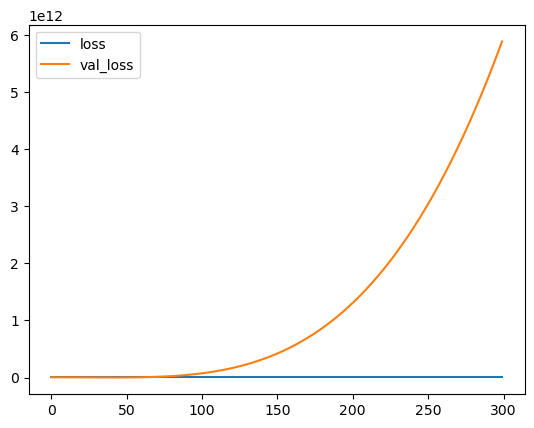

In [117]:
kayipVerisi.plot()